
**This is Project-2 i.e., Dimensionality reduction focused on PCA and tSNE. May 2021 ADSP Cohort**

## Project: PCA and tSNE
 **Marks: 30**
-----------------------------

Welcome to the project on PCA and tSNE. In this project. We will be using the auto-mpg dataset.

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [2]:
# commented as I used Google Co Lab to read the data file.
# data = pd.read_csv("auto-mpg.csv")

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# loading the datset
# updated the location of the path to load the data file from personal google drive
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/auto-mpg.csv')

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


#### Check the info of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observation:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [7]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [8]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [9]:
# checking if there are values other than digits in the column 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [10]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [11]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

#### Question 1: 
- **Check the summary statistics of the data (use describe function) (1 Mark)**
- **Write your observations (1 Mark)**

In [12]:
#Write your code here
# The following line is added to show all columns in descriptive statistics as some of the results were supressed by default
pd.set_option('max_columns', None)
desc = data.describe().T
print(desc)

              count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
horsepower    398.0   104.304020   38.222625    46.0    76.000    93.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model year    398.0    76.010050    3.697627    70.0    73.000    76.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
horsepower     125.000   230.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model year      79.000    82.0  


**Observations:________**

1) There are 398 observations in the data and 7 columns in the data at this run.

2) None of the values of the standard deviation are greater than the mean and this means that the data is not spread out and clustered around the mean. 

3) The average model year is 1976 where as the minimum was 1970 and maximum was 1982.

4) We notice a very wide range in the case of vehicle weight. The average was 2970 lbs where as the minimum was 1613 lbs and maximum was 3608 lbs.

5) We notice a very wide range in the case of miles per gallon (mpg). The minimum was 9.0 and maximum was 46.0. This highlights that the fuel consumption of cars varied from 1970 to 1982 and this may be attributed to improvement in technology and reduction in unnecessary vehicle weight. 

#### Let's check the distribution and outliers for each column in the data

#### Question 2:
- **Create the histogram to check distribution of all variables (use .hist() attribute) (1 Mark)**
- **Create boxplot to visualize outliers for all variables (use sns.boxplot()) (1 Mark)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


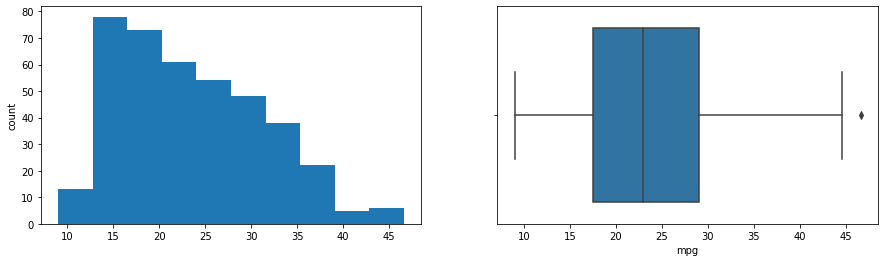

cylinders
Skew : 0.53


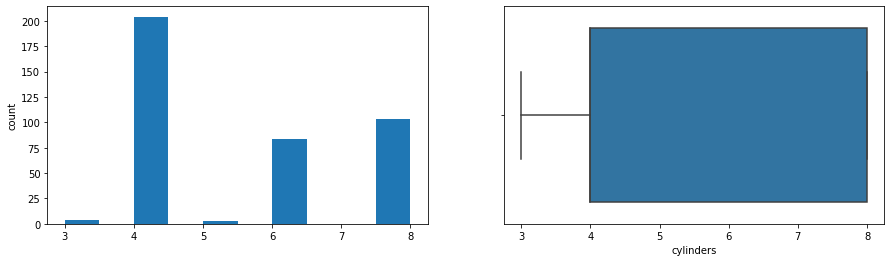

displacement
Skew : 0.72


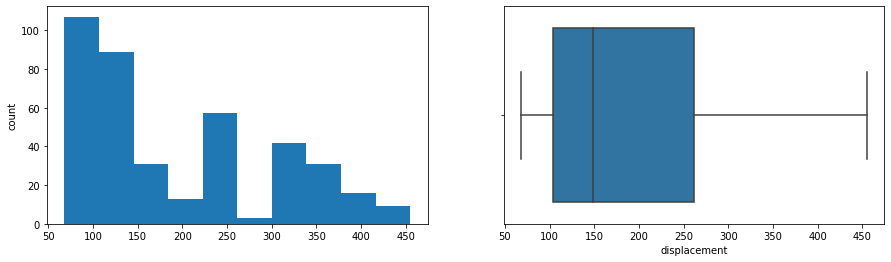

horsepower
Skew : 1.11


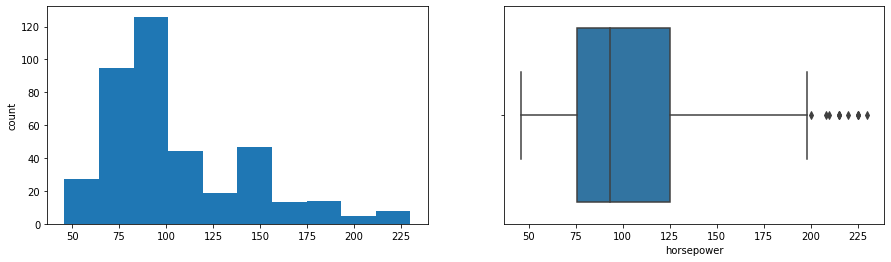

weight
Skew : 0.53


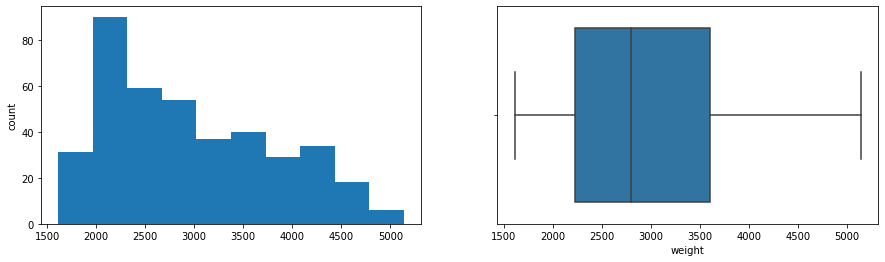

acceleration
Skew : 0.28


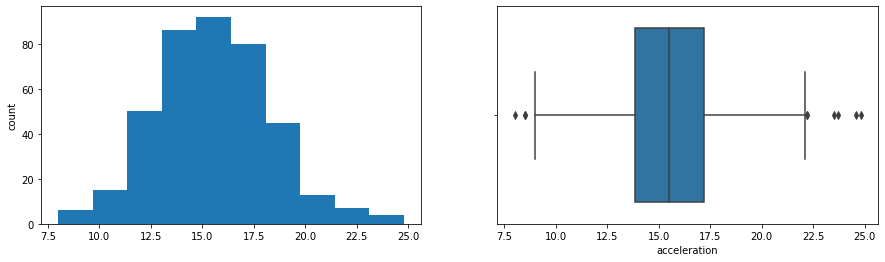

model year
Skew : 0.01


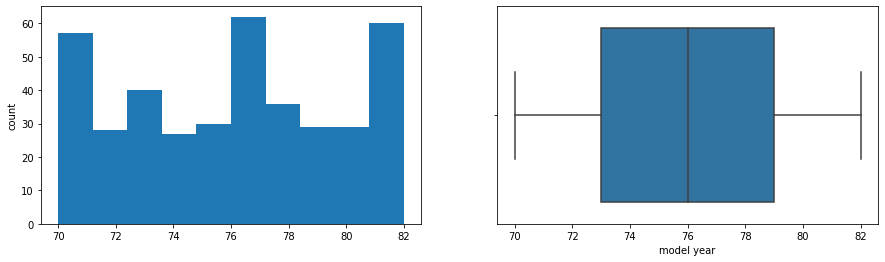

In [13]:
# Uncomment and complete the code by filling the blanks 
for col in data.columns:
     print(col)
     print('Skew :',round(data[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     data[col].hist(bins=10, grid=False)
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=data[col])
     plt.show()

**Observations:_____________**
1) The distribution plot of mpg has a skew value of 0.46 (i.e., between -0.5 
and 0.5) and looks fairly symmetrical with slight skewness. This may be due to the outlier present on the right side of the distribution as was evident from the boxplot. 

2) The distribution plot of horsepower has a skew value of 1.11 (i.e., greater than 1) and looks highly skewed to the right. We also do notice outliers on the right side of the distribution from the box plot. 

3) The distribution plot of acceleration has a skew value of 0.28 (i.e., between -0.5 and 0.5) and looks fairly symmetrical. We also do notice outliers on either extremities of the distribution. 

4) The distribution plots of weight has a skew value of 0.53 (i.e., between 0.5 and 1) and displacement has a skew value of 0.72 (i.e., between 0.5 and 1) and look moderately skewed to the right. 

5) The distribution plot of model year has peaks at 1970, 1976 and 1982 and the boxplot seems pretty symmetrical.

#### Checking correlation

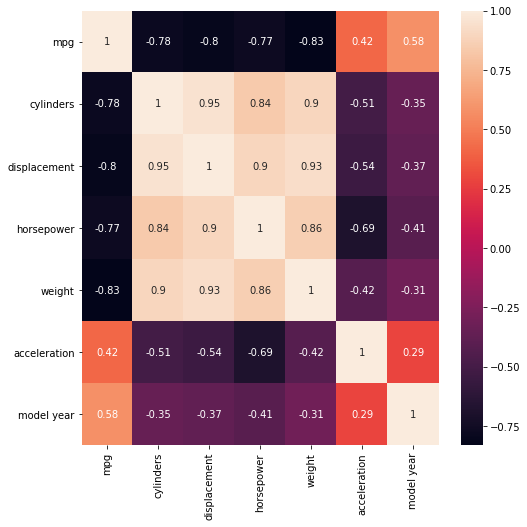

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [15]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [16]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

#### Question 3:

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data with random_state=1 (2 Marks)**
- **Write observations on the variance explained by components (2 Marks)**

In [17]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

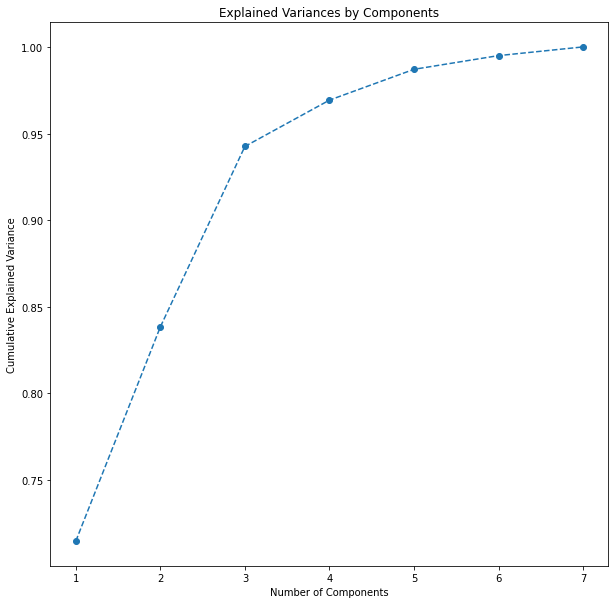

In [18]:
# visulaize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [19]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations:___________________**
1) We can see that out of the 7 features, we reduced the number of features through principal components to 3, these components explain about 96% of the original variance.

2) So that is about 96% reduction in the dimensionality with a loss of 70% in variance.

3) Let us now look at these principal components as a linear combination of original features.

In [20]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


#### Question 4: **Interpret the coefficients of three principal components from the below dataframe (6 Marks)**

In [21]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:__________________**

1) The first principal component, PC1, captures attributed related to the body structure of the vehicles like cylinders, displacement, horsepower, and weight. It is also related to low values for mpg.

2) The second principal component, PC2, captures attribute related to model year of the vehicle. It is related to lower values i.e., may be highlighting old model cars.

3) The third principal component, PC3, captures attribute related to the acceleration of the vehicle. 

#### We can also visualize the data in 2 dimensions using first two principal components 

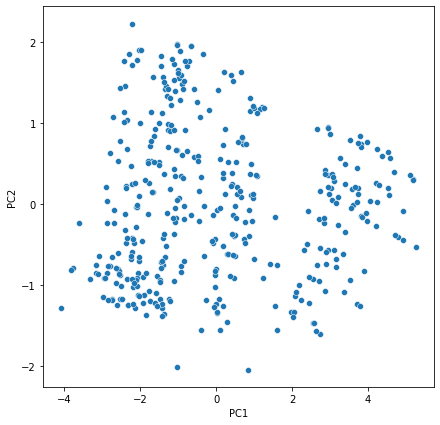

In [22]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Let's try adding hue to the scatter plot**

#### Question 5: 

- **Create a scatter plot for first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**

Text(0, 0.5, 'PC2')

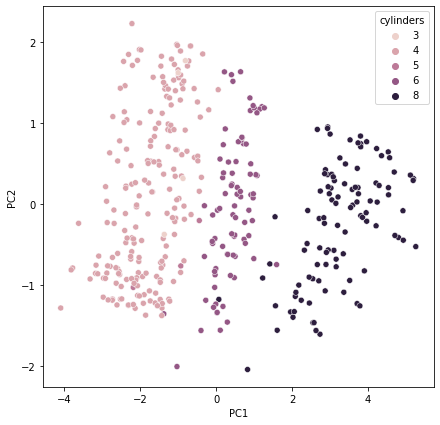

In [23]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
#Create a scatter plot with x=0 and y=1 using df_concat dataframe
# 1. sns.scatterplot(x=df_concat[0], y=df_concat[1], hue = df_concat["cylinders"])
# 2. sns.scatterplot(x=df_concat[0], y=df_concat[1], hue ="cylinders", data=df_concat)
sns.scatterplot(x=df_concat[0], y=df_concat[1], hue ="cylinders", data=df_concat)
plt.xlabel("PC1")
plt.ylabel("PC2")

**Observations:___________**
1) The plot clearly shows how the number of cylinders in the vehicle are distributed in the 2-D space.

2) The plot clearly shows that the vehicles are grouped by the number of cylinders in their make. 
(a) Cluster-1 has a grouping of vehicles with number of cylinders = 3 and 4. 
(b) Cluster-2 has a grouping of vehicles with number of cylinders = 5 and 6.
(c) Cluster-3 has a grouping of only vehicles with number of cylinders = 8.

## t-SNE

#### Question 6: 
- **Apply the TSNE embedding with 2 components for the dataframe data_scaled (use random_state=1) (2 Marks)**
- **Write your observations on the below scatter plots (2 Marks)**   

In [24]:
tsne = TSNE(n_components = 2, random_state=1)  #Apply the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled) #Fit and transform tsne function on the scaled data

In [25]:
data_tsne.shape

(398, 2)

In [26]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [27]:
data_tsne.head()

,Component 1,Component 2
0,-38.088413,-15.912958
1,-37.404369,-17.995850
2,-38.050472,-17.063194
3,-37.718334,-16.476006
4,-38.404663,-16.763493


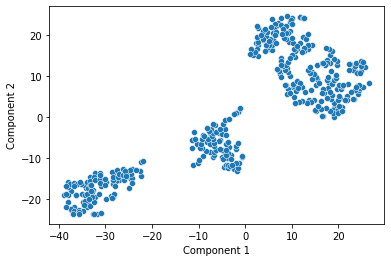

In [28]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

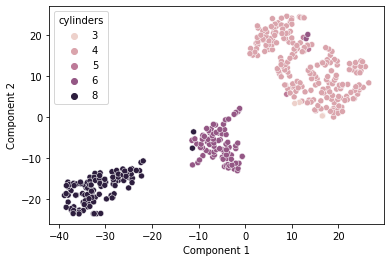

In [29]:
# Lets see scatter plot of the data w.r.t number of cyinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders)

**Observations:______________**

1) The plot clearly shows how the number of cylinders in the vehicle are distributed in the 2-D space.

2) The plot clearly shows that the vehicles are grouped by the number of cylinders in their make. 
(a) Cluster-1 has a grouping of only vehicles with number of cylinders = 8. 
(b) Cluster-2 has a grouping of vehicles with number of cylinders = 6 and a very few related to 8.
(c) Cluster-3 has a grouping of  vehicles with number of cylinders = 3, 4, and 5.

In [30]:
# Lets assign points to the 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [33]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

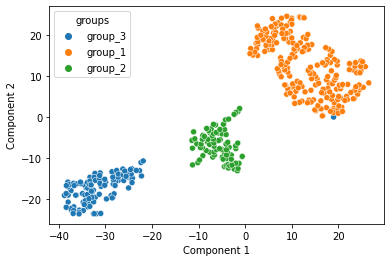

In [34]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [35]:
data['groups'] = data_tsne['groups'] 

#### Question 7: 
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (4 Marks)**

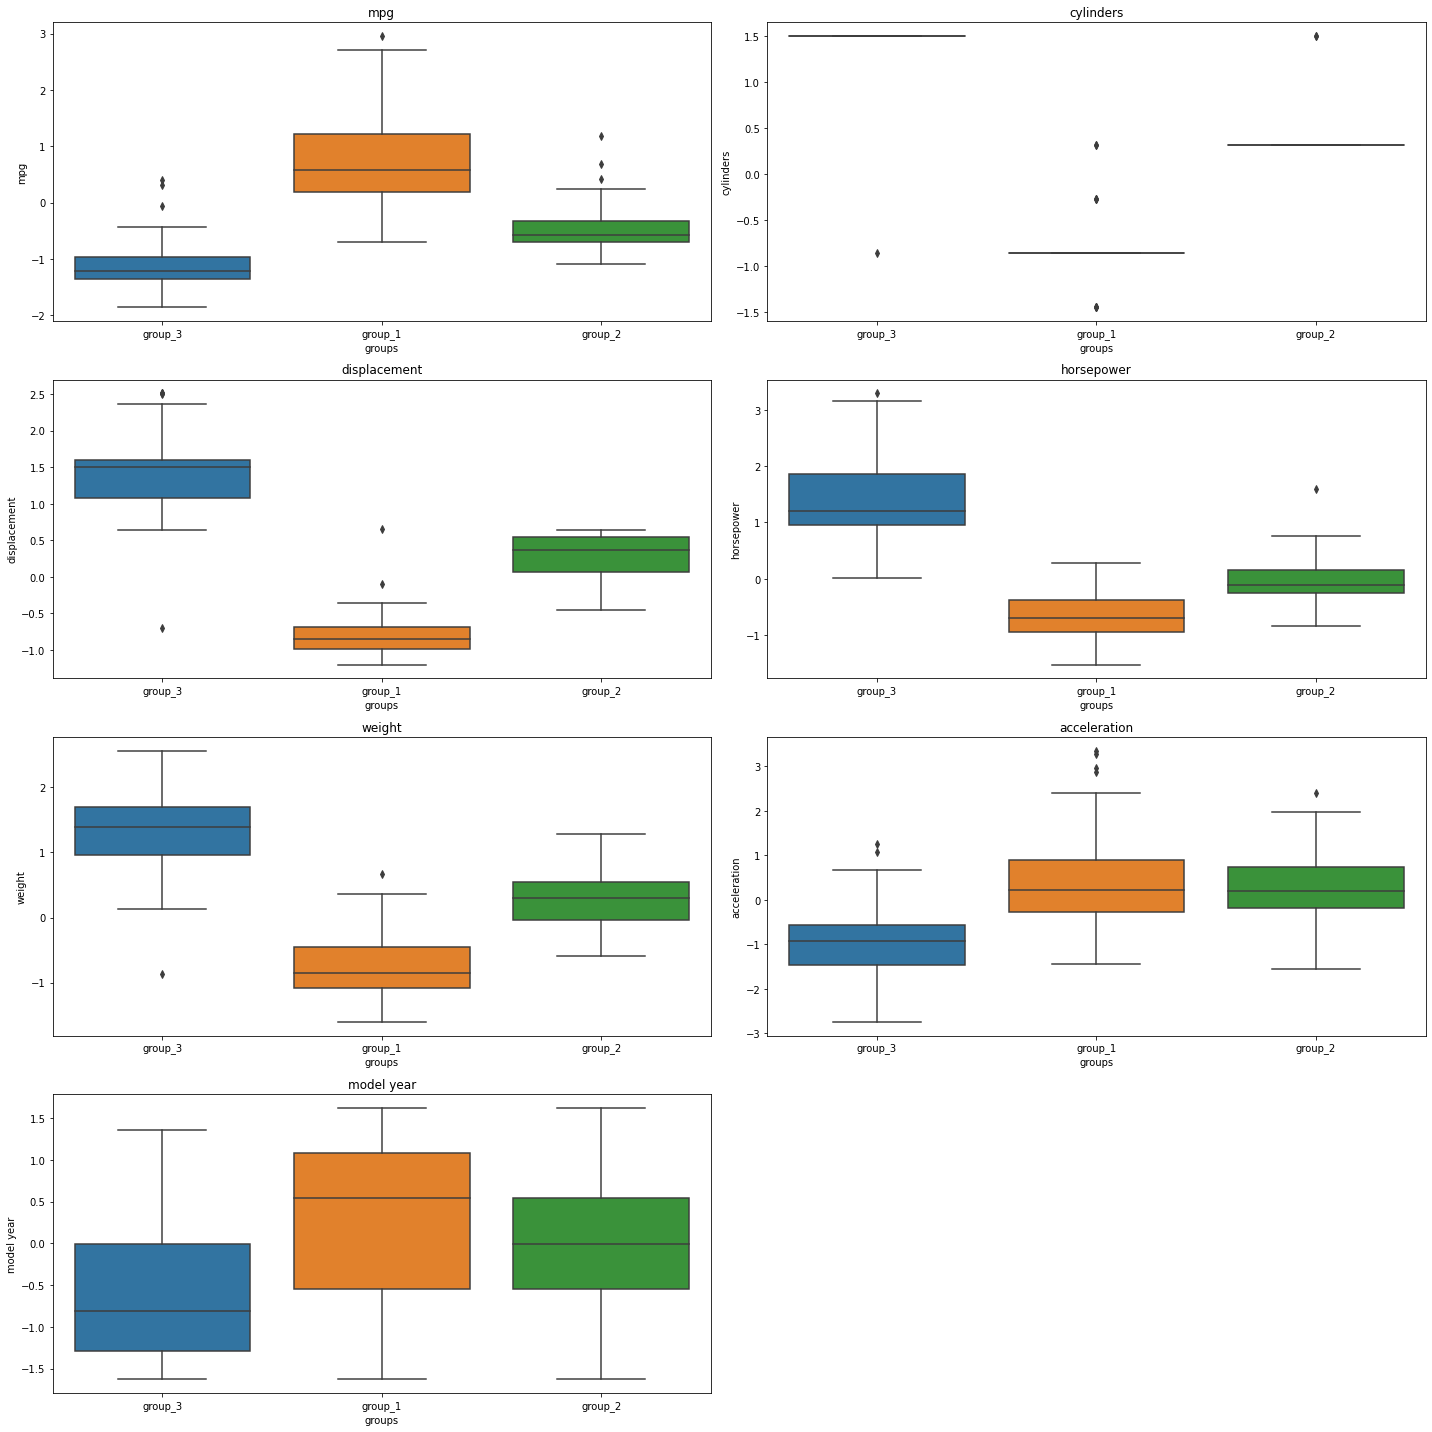

In [36]:
all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis
    sns.boxplot(y=data_scaled[variable], x=data_tsne['groups'])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:___________**

1)There are three groups in the data. Each group has different set of characteristics.

2) Group 1 represents vehicles with higher miles per gallon (mpg) followed by vehicles in group 2 and group 3. 

3) Vehicles in group 3 have higher horsepower followed by those in group 2 and group 1.

4) Vehicles in group 3 have higher displacement, horsepower followed by those in group 2 and group 1. 

5) Vehicles in group 3 are heavier than those in groups 2 and 1.

6) Vehicles in group 1 have higher acceleration closely followed by those in group 2 and then by group 3.

7) Vehicles in group 3 have higher number of cylinders than those in groups 2 and 1.



In [ ]:
# Google Co Lab didn't have the option to download the .ipynb script as a html file
# The following script helps in download the .ipynb file first and then reimport within the environment for creating a .html file
%%shell
jupyter nbconvert --to html /content/Learner_Notebook_Project_Marketing_Campaign_Analysis.ipynb